*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

# Binomial and Poisson Distribution for Binary Outcome

This notebook introduces the concept and methodology of leveraging Binomial and Poisson Distribution for predicting binary outcome.

<br>
<div class="alert alert-info">
<h4>Disclaimer</h4><p>The information on this page is based on the petroleum engineering class taught at the <i>University of Texas at Austin</i>, <b>Introduction to Geostatistics</b> by <b>Dr. Michael Pyrcz</b> on Fall 2018. This notebook is a work of a petrolem engineering student, <b>Eric Kim</b>.
</div>

# 0. Sample Data Set

No spreedsheet data will be imported for this work. But instead, a few parameters will be pre-defined for further analysis.

For **Binomial Distribution** analysis, the following will be assumed:

> 1. Exploration drilling will be used for case study

> 2. There are two exploration programs

> 3. Exploration program 1 has 20% chance of success

> 4. Exploration program 2 has 40% chance of success

> 5. 20 wells exploration for each program

In [17]:
import pandas as pd
import numpy as np



For **Poisson Distribution** analysis, the following will be assumed:

> 1. Pump failures over an year will be used for case study

> 2. There are two pumps

> 3. Pump 1 failed 5 times in 1 year

> 4. Pump 2 fialed 8 times in 1 year

> 5. Up to 20 failures can happen in 1 year

In [16]:
pump_1_fail = 5
pump_2_fail = 8
max_pump_fail = 20

pd.DataFrame(data=np.array([pump_1_fail, pump_2_fail, max_pump_fail]), 
             index=['Pump 1', 'Pump 2', 'Max. Possible Failures'], columns=['Failure in 1 year']).T

,Pump 1,Pump 2,Max. Possible Failures
Failure in 1 year,5,8,20


# 1. Purpose - What Do We Want To Achieve?

We want to answer the following two questions:

> 1. What is the chance of an exploration drilling failure? - Use **Binomial Distribution**

> 2. What is the chance of a given pump failing X times an year? - Use **Poisson Distribution**

# 2.  Binomial Distribution
<br>
<div class="alert alert-info">
    <p>Use <i>Binomial Distribution</i> when given the <b>exact probability of success or failure for a trial</b> and you want successes <b>over a number of trials</b> </p>
</div>


# 3.  Poisson Distribution
<br>
<div class="alert alert-info">
    <p>Use <i>Poisson Distribution</i> when given the <b>average number of successes or failures</b> of an event happening <b>per interval, unit time (or cycle), or space</b></p>
</div>

An equation for *Poisson Distribution* function is as follows:

\begin{equation*}
f(x) = \frac{e^{-\lambda} \lambda^{x}}{x!}, \ \ F(x) = \sum\limits_{i=1}^{x}\frac{e^{-\lambda} \lambda^{x}}{x!}
\end{equation*}

Where

&nbsp;&nbsp;&nbsp;&nbsp;$\lambda$ = average number of occurences in an unit time 

&nbsp;&nbsp;&nbsp;&nbsp;$x$ = actual number of occurences

The left notation is for *Probability Density Function (PDF)*, and the right notation is for *Cumulative Distribution Function (CDF)*. For more information about PDF and CDF, refer to [CDF and PDF plotting for Probability Estimation].(https://github.com/aegis4048/Petroleum_Engineering/blob/master/Data%20Analysis/CDF%20and%20PDF%20plotting%20for%20Probability%20Estimation.ipynb)

## 3.1 PDF Plotting for Poisson Distribution

PDF for the Poisson Distribution of pump failures in one year can be plotted. Remember from **Section 0. Sample Data Set**:

&nbsp;&nbsp;&nbsp;&nbsp;n = 20

&nbsp;&nbsp;&nbsp;&nbsp;$\lambda$ = 5,  for pump 1

&nbsp;&nbsp;&nbsp;&nbsp;$\lambda$ = 8,  for pump 2

**scipy.stats.poisson.pmf** will be used to calculate the PDF Poisson Distribution of the data. [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

In [148]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib notebook

n = 20                # max. possible number of failures in one year
Lambda_1 = 5          # pump 1 fails on avg 5 times a year
Lambda_2 = 8          # pump 2 fails on avg 8 times a year

# number of pump failures in 1 year
x = [i for i in range(n)] 

# PDF Poission Distribution calculation
y_1 = poisson.pmf(x, Lambda_1)
y_2 = poisson.pmf(x, Lambda_2)

<IPython.core.display.Javascript object>


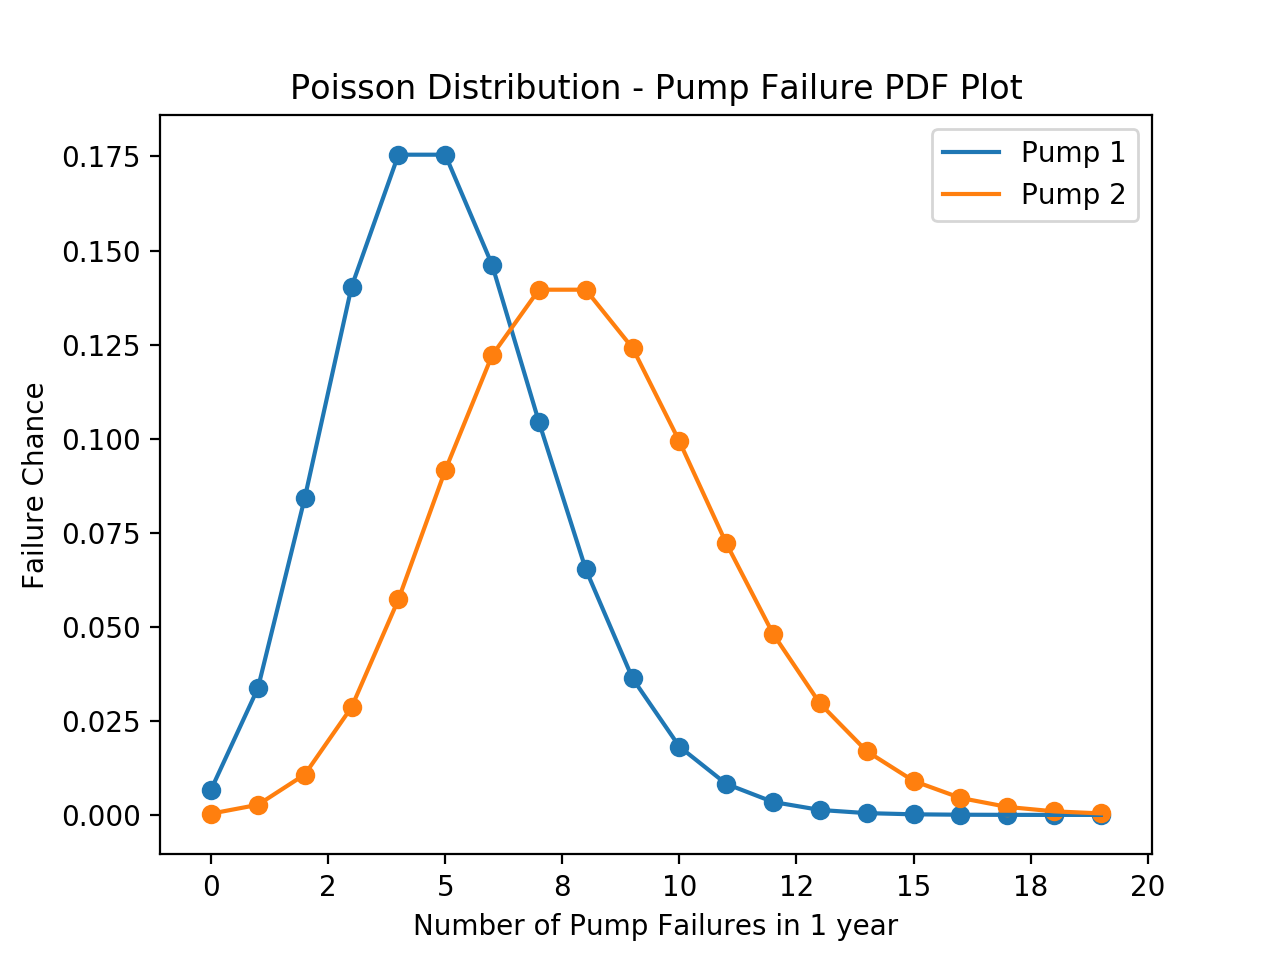

In [150]:
# plotting
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y_1, label='Pump 1')
ax.plot(x, y_2, label='Pump 2')
ax.legend()
ax.scatter(x, y_1)
ax.scatter(x, y_2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_title('Poisson Distribution - Pump Failure PDF Plot')
ax.set_xlabel('Number of Pump Failures in 1 year')
ax.set_ylabel('Failure Chance');

In [151]:
# Display as table
y_1_new = np.round(y_1 * 100, 1)
y_2_new = np.round(y_2 * 100, 1)
x = np.array(x)

df = pd.DataFrame(data=np.array([x, y_1_new, y_2_new]).T, 
                  columns=['Pump Failures in 1 year', 'Pump 1 Failure Chance (%)', 'Pump 2 Failure Chance (%)'])
df.iloc[:, 0] = df.iloc[:, 0].astype('int')
df.head(10)

,Pump Failures in 1 year,Pump 1 Failure Chance (%),Pump 2 Failure Chance (%)
0,0,0.7,0.0
1,1,3.4,0.3
2,2,8.4,1.1
3,3,14.0,2.9
4,4,17.5,5.7
5,5,17.5,9.2
6,6,14.6,12.2
7,7,10.4,14.0
8,8,6.5,14.0
9,9,3.6,12.4


The information in the above plot and table can be interpreted as the following:

&nbsp;&nbsp;&nbsp;&nbsp;1. There are **17.5%** chance that **Pump 1** will fail **5 times** in a year

&nbsp;&nbsp;&nbsp;&nbsp;2. There are **9.2%** chance that **Pump 2** will fail **5 times** in a year

&nbsp;&nbsp;&nbsp;&nbsp;3. There are **6.5%** chance that **Pump 1** will fail **8 times** in a year

&nbsp;&nbsp;&nbsp;&nbsp;4. There are **14.0%** chance that **Pump 2** will fail **8 times** in a year

## 3.2 CDF Plotting for Poisson Distribution

CDF for the Poisson Distribution of pump failures in one year can be plotted.
**scipy.stats.poisson.cdf** will be used to calculate the CDF Poisson Distribution of the data. [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

The same $\lambda$ and n values used for PDF plotting will also be used for CDF plotting

In [152]:
# number of pump failures in 1 year
x = [i for i in range(n)] 

# PDF Poission Distribution calculation
y_1 = poisson.cdf(x, Lambda_1)
y_2 = poisson.cdf(x, Lambda_2)

<IPython.core.display.Javascript object>


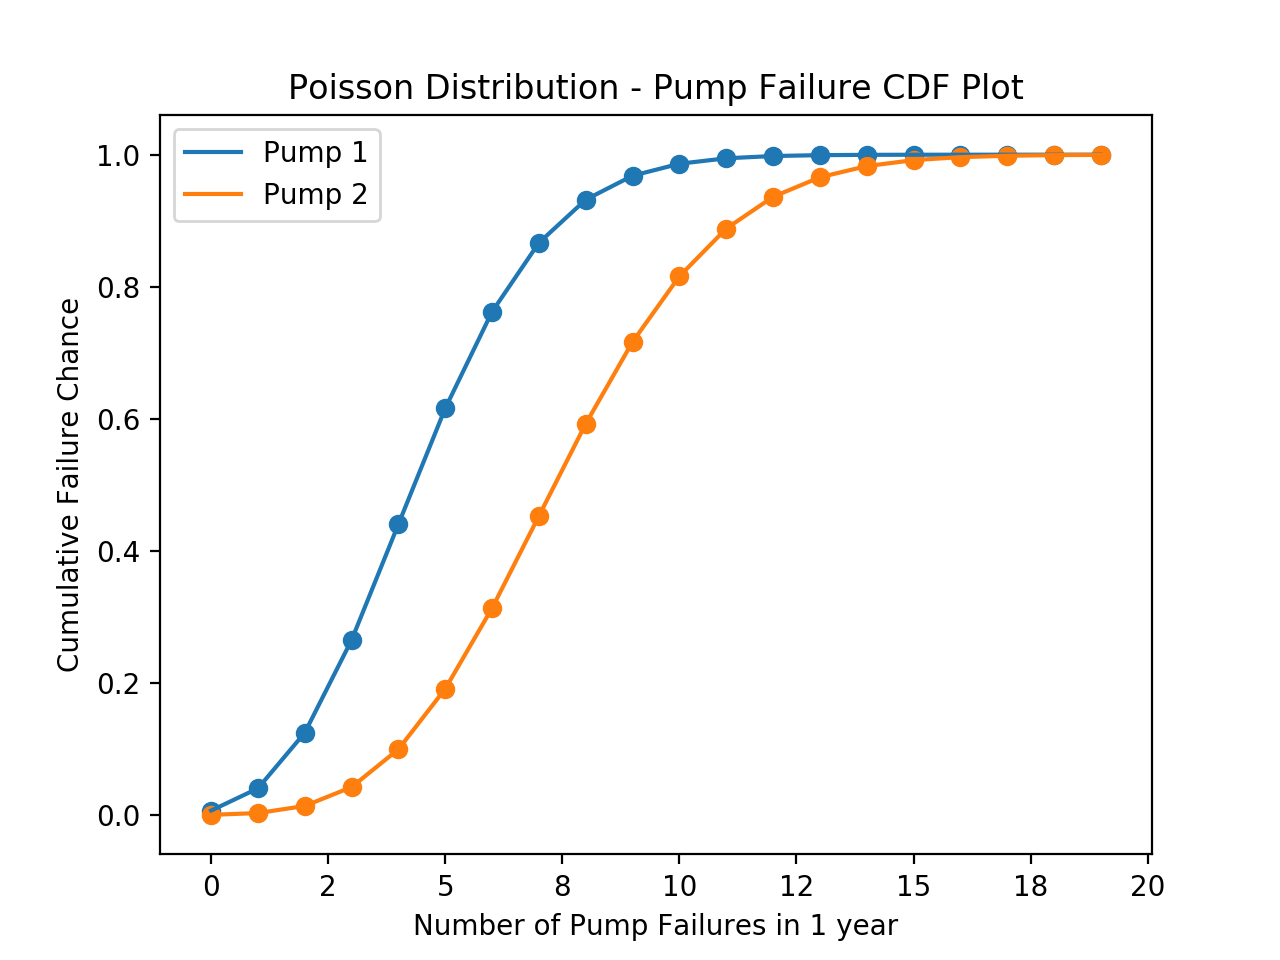

In [153]:
# plotting
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y_1, label='Pump 1')
ax.plot(x, y_2, label='Pump 2')
ax.legend()
ax.scatter(x, y_1)
ax.scatter(x, y_2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_title('Poisson Distribution - Pump Failure CDF Plot')
ax.set_xlabel('Number of Pump Failures in 1 year')
ax.set_ylabel('Cumulative Failure Chance');